<a href="https://colab.research.google.com/github/OrtegaJulio7/SIS420/blob/main/Lab6_sis420.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LABORATORIO 6


Este es un entrenamiento y prueba de aprendizaje por refuerzo del juego de carta Black Jack
donde elaboramos un modelo que logra jugar el juego de una manera efectiva

Grupo 5
Integrantes

1. Aly Delgado Danner Abel
2. Lujan Renteria
3. Itzel Emily Velasquez Guerra
4. Julio Cesar Ortega Albarado
5. Rojas Vasquez Sheila

## Entrenamiento del modelo

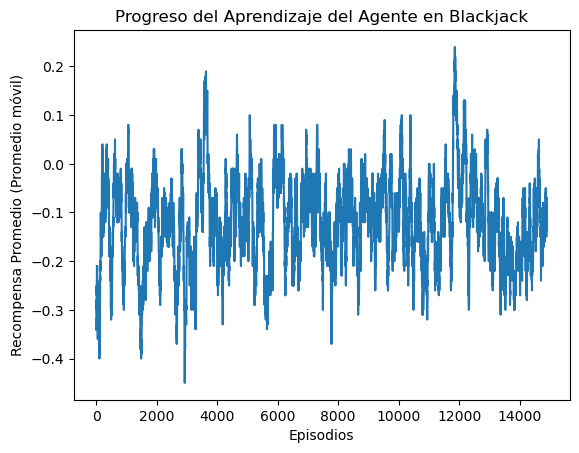

In [ ]:
import gymnasium as gym
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Inicializar el entorno
env = gym.make("Blackjack-v1", natural=False)

# Parámetros de Q-learning
alpha = 0.1     # Tasa de aprendizaje
gamma = 0.99    # Factor de descuento
epsilon = 0.1   # Tasa de exploración

# Inicializar Q-table con ceros para cada combinación posible de estado y acción
q_table = {}
for player_sum in range(4, 22):
    for dealer_card in range(1, 11):
        for usable_ace in [0, 1]:
            q_table[(player_sum, dealer_card, usable_ace)] = [0, 0]  # Palo, Golpear

# Definir la política de acción (ε-greedy)
def choose_action(state, training=True):
    if training and np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(q_table[state])

# Lista para registrar las recompensas por episodio
rewards_per_episode = []

# Entrenar el agente con Q-learning
for episode in range(15000):
    state, info = env.reset()
    done = False
    total_reward = 0

    while not done:
        player_sum, dealer_card, usable_ace = state
        action = choose_action(state)

        # Tomar el paso en el entorno y recibir el nuevo estado y recompensa
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        # Actualizar Q-table usando la ecuación de Q-learning
        if not done:
            next_action = np.argmax(q_table[next_state])
            q_table[state][action] = q_table[state][action] + alpha * (
                reward + gamma * q_table[next_state][next_action] - q_table[state][action]
            )
        else:
            q_table[state][action] = q_table[state][action] + alpha * (reward - q_table[state][action])

        # Acumular la recompensa
        total_reward += reward
        state = next_state

    # Guardar la recompensa total del episodio
    rewards_per_episode.append(total_reward)

# Suavizar la recompensa usando un promedio móvil para mejorar la visualización
window_size = 100
smoothed_rewards = np.convolve(rewards_per_episode, np.ones(window_size) / window_size, mode='valid')

# Graficar las recompensas suavizadas por episodio
plt.plot(smoothed_rewards)
plt.xlabel('Episodios')
plt.ylabel('Recompensa Promedio (Promedio móvil)')
plt.title('Progreso del Aprendizaje del Agente en Blackjack')
plt.show()


## Q-table
Valores de acciones para cada estado

In [ ]:
# Imprimir la Q-table
for state, actions in q_table.items():
    print(f"Estado {state}: Palo={actions[0]:.2f}, Golpear={actions[1]:.2f}")

Estado (4, 1, 0): Palo=-0.09, Golpear=-0.11
Estado (4, 1, 1): Palo=0.00, Golpear=0.00
Estado (4, 2, 0): Palo=-0.10, Golpear=-0.05
Estado (4, 2, 1): Palo=0.00, Golpear=0.00
Estado (4, 3, 0): Palo=-0.19, Golpear=-0.02
Estado (4, 3, 1): Palo=0.00, Golpear=0.00
Estado (4, 4, 0): Palo=-0.06, Golpear=-0.01
Estado (4, 4, 1): Palo=0.00, Golpear=0.00
Estado (4, 5, 0): Palo=-0.10, Golpear=-0.03
Estado (4, 5, 1): Palo=0.00, Golpear=0.00
Estado (4, 6, 0): Palo=0.01, Golpear=0.06
Estado (4, 6, 1): Palo=0.00, Golpear=0.00
Estado (4, 7, 0): Palo=-0.10, Golpear=-0.03
Estado (4, 7, 1): Palo=0.00, Golpear=0.00
Estado (4, 8, 0): Palo=-0.10, Golpear=-0.09
Estado (4, 8, 1): Palo=0.00, Golpear=0.00
Estado (4, 9, 0): Palo=-0.10, Golpear=-0.08
Estado (4, 9, 1): Palo=0.00, Golpear=0.00
Estado (4, 10, 0): Palo=-0.41, Golpear=-0.30
Estado (4, 10, 1): Palo=0.00, Golpear=0.00
Estado (5, 1, 0): Palo=-0.27, Golpear=-0.25
Estado (5, 1, 1): Palo=0.00, Golpear=0.00
Estado (5, 2, 0): Palo=-0.13, Golpear=-0.13
Estado (5,

## Prueba del modelo con EXPLOTACION

In [ ]:
# Prueba del agente después de entrenar usando la Q-table guardada
def test_agent(num_episodes=50):  # Reducimos el número de episodios para hacer el resultado más legible
    wins, losses, draws = 0, 0, 0

    # Cargar la Q-table guardada
    with open("q_table_blackjack4.pkl", "rb") as file:
        q_table = pickle.load(file)

    # Jugar con el agente entrenado
    for episode in range(num_episodes):
        state, info = env.reset()
        done = False
        episode_steps = []  # Lista para almacenar el historial de jugadas del episodio
        final_player_sum = None

        print(f"\n--- Episodio {episode + 1} ---")

        while not done:
            # Obtener la acción de la Q-table
            action = np.argmax(q_table[state])  # Seleccionar la mejor acción según la Q-table

            # Registrar el estado actual y la acción
            player_sum, dealer_card, usable_ace = state
            action_name = "Golpear" if action == 1 else "Palo"
            episode_steps.append({
                "Jugador": player_sum,
                "Carta Crupier": dealer_card,
                "As Utilizable": usable_ace,
                "Acción": action_name
            })

            # Si el jugador elige "palo", guardamos la suma final del jugador
            if action == 0:  # Si elige "Palo"
                final_player_sum = player_sum

            # Realizar la acción
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            state = next_state

        # Resultado final del episodio
        if reward == 1:
            wins += 1
            outcome = "Ganó"
        elif reward == -1:
            losses += 1
            outcome = "Perdió"
        else:
            draws += 1
            outcome = "Empató"

        # Mostrar el historial del episodio
        print(f"Resultado: {outcome}")
        for step, details in enumerate(episode_steps):
            print(f"Jugada {step + 1}: Jugador={details['Jugador']}, "
                  f"Carta Crupier={details['Carta Crupier']}, "
                  f"As Utilizable={details['As Utilizable']}, "
                  f"Acción={details['Acción']}")

        # Mostrar el puntaje final del jugador
        print(f"Jugador terminó con: {final_player_sum}")

    print(f"\nResultados tras {num_episodes} episodios:")
    print(f"Victorias: {wins}")
    print(f"Derrotas: {losses}")
    print(f"Empates: {draws}")
    print(f"Total ganadas: {wins}")
    print(f"Total perdidas: {losses}")

# Ejecutar el test del agente
test_agent()



--- Episodio 1 ---
Resultado: Perdió
Jugada 1: Jugador=17, Carta Crupier=10, As Utilizable=0, Acción=Palo
Jugador terminó con: 17

--- Episodio 2 ---
Resultado: Perdió
Jugada 1: Jugador=14, Carta Crupier=9, As Utilizable=1, Acción=Golpear
Jugada 2: Jugador=16, Carta Crupier=9, As Utilizable=1, Acción=Golpear
Jugada 3: Jugador=15, Carta Crupier=9, As Utilizable=0, Acción=Golpear
Jugador terminó con: None

--- Episodio 3 ---
Resultado: Ganó
Jugada 1: Jugador=20, Carta Crupier=7, As Utilizable=0, Acción=Palo
Jugador terminó con: 20

--- Episodio 4 ---
Resultado: Perdió
Jugada 1: Jugador=8, Carta Crupier=2, As Utilizable=0, Acción=Golpear
Jugada 2: Jugador=19, Carta Crupier=2, As Utilizable=1, Acción=Palo
Jugador terminó con: 19

--- Episodio 5 ---
Resultado: Perdió
Jugada 1: Jugador=13, Carta Crupier=10, As Utilizable=0, Acción=Golpear
Jugador terminó con: None

--- Episodio 6 ---
Resultado: Perdió
Jugada 1: Jugador=8, Carta Crupier=3, As Utilizable=0, Acción=Golpear
Jugada 2: Jugador=18